In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2025-04-27 17:46:51.523274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745776011.795503      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745776011.874107      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Expand dimensions (CNNs expect 3D input: (height, width, channels))
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])


2025-04-27 17:48:39.059302: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    data_augmentation,

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.7355 - loss: 0.8035 - val_accuracy: 0.9717 - val_loss: 0.0896
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9422 - loss: 0.1855 - val_accuracy: 0.9808 - val_loss: 0.0628
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9571 - loss: 0.1359 - val_accuracy: 0.9803 - val_loss: 0.0675
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9676 - loss: 0.1062 - val_accuracy: 0.9857 - val_loss: 0.0467
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9705 - loss: 0.0927 - val_accuracy: 0.9823 - val_loss: 0.0676
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9746 - loss: 0.0810 - val_accuracy: 0.9882 - val_loss: 0.0456
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9765 - loss: 0.0758 - val_accuracy: 0.9800 - val_loss: 0.0707
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9793 - loss: 0.0665 - 

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9831 - loss: 0.0593
Test Accuracy: 0.9854000210762024


Test Accuracy: 0.9854000210762024

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


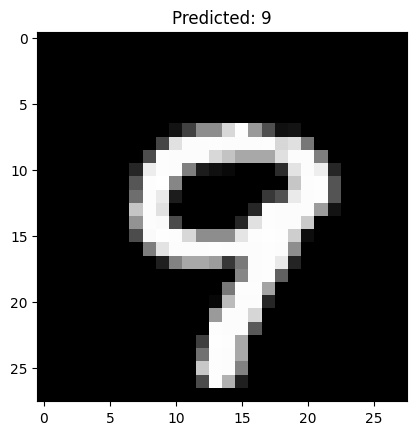

In [23]:
predictions = model.predict(X_test)
index = np.random.randint(0, len(X_test)) #plot of a random image
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.show()